# Notebook - Solving Differential Equations Numerically


## Part 1 - Euler's Method

In [1]:
import sympy as sy
sy.init_printing() # display better looking symbols in Jupyter notebooks
import numpy as np
import matplotlib.pyplot as plt


delta_t 1.5


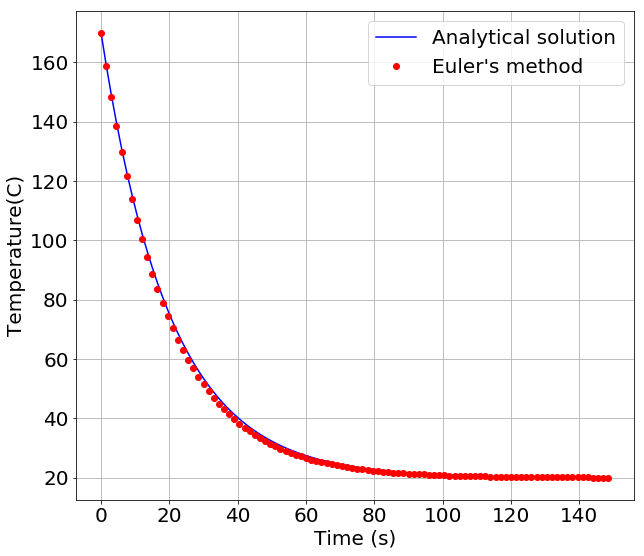

In [2]:
# Perform the Euler method to numerical solve a differential equation (Newton's heat equation)
#    given some starting condition

# Function which finds the slope 
#  for a given time and temperature
def f_euler(t,k,T_env,T):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# Function which evaluates the analytical solution
#  for a given time 
def f_ana(t,k,T_env,T_0):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (minutes)
a = 0.0
b = 150.0

# Set number of time divisions and step size delta_t
N = 100
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Empty lists to store temperature
Tpoints_euler  = []
Tpoints_ana    = []

# Start the process at t=0
Temp = T_0

for t in tpoints:
    
    # put the temperatures for this time
    #  iteration into the array
    Tpoints_euler.append(Temp)
    Tpoints_ana.append( f_ana(t,k,T_env,T_0) )
        
    # Use the current time and temperature
    #  and the differential equation to find the slope
    #  at this time then perform euler's method
    #  to find the temp for the next iteration
    Temp += delta_t*f_euler(t,k,T_env,Temp)

    
plt.figure(figsize=(10,9))

plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')
plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

Caution: In some situations a numerical solution for a differential equation can become unstable. Some differential equations more more susceptible to this. These are known as stiff differential equations. Alternative methods can be used if this is a problem.

delta_t 50.0


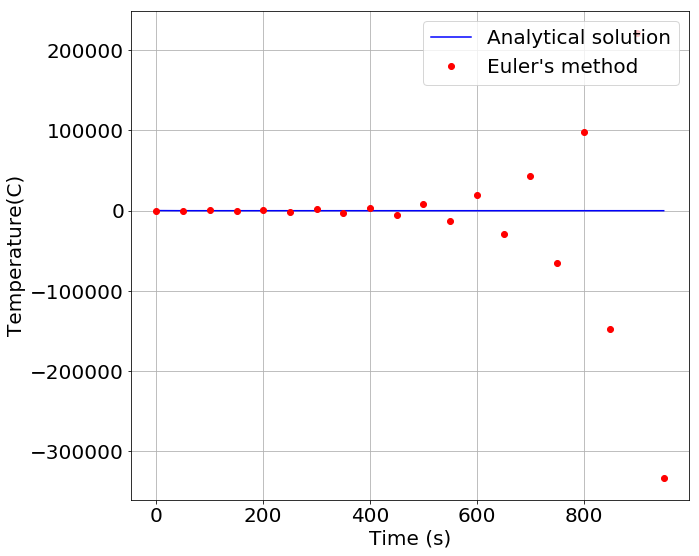

In [21]:
# Perform the Euler method to numerical solve a differential equation (Newton's heat equation)
#    given some starting condition

# Function which finds the slope 
#  for a given time and temperature
def f_euler(t,k,T_env,T):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# Function which evaluates the analytical solution
#  for a given time 
def f_ana(t,k,T_env,T_0):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (minutes)
a = 0.0
b = 1000.0

# Set number of time divisions and step size delta_t
N = 20
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Empty lists to store temperature
Tpoints_euler  = []
Tpoints_ana    = []

# Start the process at t=0
Temp = T_0

for t in tpoints:
    
    # put the temperatures for this time
    #  iteration into the array
    Tpoints_euler.append(Temp)
    Tpoints_ana.append( f_ana(t,k,T_env,T_0) )
        
    # Use the current time and temperature
    #  and the differential equation to find the slope
    #  at this time then perform euler's method
    #  to find the temp for the next iteration
    Temp += delta_t*f_euler(t,k,T_env,Temp)

    
plt.figure(figsize=(10,9))

plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')
plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

In [42]:
# Define a function which performs Euler's method

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler_vec(a,b,N,initial_value):

    delta_t = (b-a)/N  # find the step size delta_t
    x = initial_value   # Set the initial condition 
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run Euler: delta_t = ",delta_t, " r_initial = ",r_initial)
    
    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    
    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(x) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting
        #  perform euler's method (setup the values for the next time iteration)
        x += delta_t * f(x,t)
        
    return xpoints, tpoints

## Part 2 - Solving Differential equaitons using built in tools

The scipy (scientific python) library includes multiple tools to solve ordinary diffential equation (ode) "initial value problems (ivp)". For example: scipy.integrate.odeint 

Other languages have similar tools (C++ has odeint, matlab has dsolve, FORTRAN has odepack)

#### odeint
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)

Here func is the function, y0 is the initial value, and t is the time array over which you would like to solve, and args is a tuple containing the value of constants.

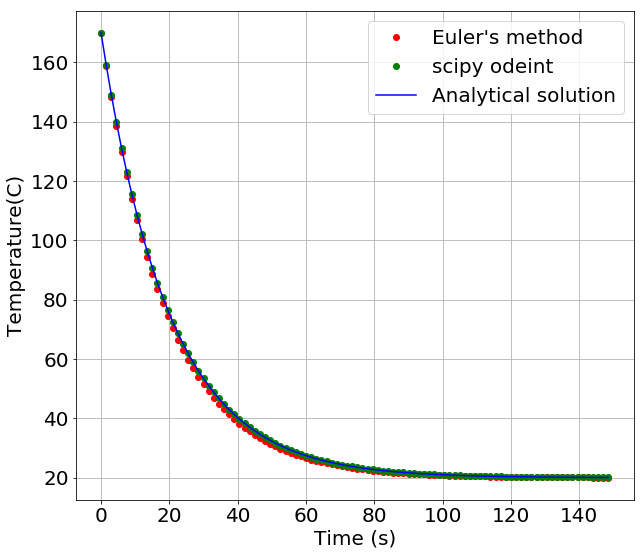

In [8]:
from scipy.integrate import odeint

############
# Define and solve the diffEQ

def f(T,t,k,T_env):
    myf = -k * ( T - T_env )
    return myf

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Solve
soln = odeint(f, T_0, tpoints, args=(k, T_env)) # returns an array of arrays, each containing the values for each function (in this case we only have the temperature function)
Tpoints_odeint = soln[:, 0] 
#print(Tpoints_odeint)

############
# Make plots

plt.figure(figsize=(10,9))

plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")
plt.plot(tpoints,Tpoints_odeint, "go" , label="scipy odeint")
plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()


It is also possible to use a computer to find the analytical solution to a diffential equation (if possible). 

Sympy is a python library for symbolic math (it is like a free Mathematica)

In [22]:
import sympy as sy
sy.init_printing() # display better looking symbols in Jupyter notebooks

In [24]:
t, T_0, T_env, k = sy.symbols("t, T_{0}, T_{env}, k")
T = sy.Function("T")

In [25]:
T(t)

In [26]:
ode = sy.Derivative( T(t) , t ) + k*(T(t)-T_env)

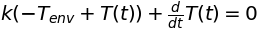

In [27]:
sy.Eq(ode) 

In [28]:
solution = sy.dsolve(ode)

In [29]:
solution

In [30]:
solution.lhs

In [31]:
solution.rhs

In [32]:
sy.Eq( solution.lhs -  solution.rhs )

In [33]:
sy.Eq( solution.lhs.subs(t,0) -  solution.rhs.subs(t,0) )

In [34]:
C1 = sy.solve(  sy.Eq( solution.lhs.subs(t,0) -  solution.rhs.subs(t,0) ) )
C1

In [35]:
solution.subs(C1[0])


## Part 3 - Solving Simultaneous Differential Equations

In [44]:
# Define functions to solve simultaneous differential equations

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition (r is a 1D numpy array (a vector))
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run Euler: delta_t = ",delta_t, " r_initial = ",r_initial)
    
    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []
    
    # loop over the time range with step size delta_t
    for t in time_array:
        #print(r[0],r[1])
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting
        #  perform euler's method (setup the values for the next time iteration)
        r += delta_t * f(r,t)
        
    return xpoints, ypoints, tpoints

In [51]:

# ------------------------------------------------------------------------
# define two simultaneous ode 
# dr/dt = f(r,t)
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

# ------------------------------------------------------------------------
  
# Set time range a->b (seconds), the number of steps N, and the initial ocndition
a = 0.0
b = 100.0   
N = 1000
r_initial = np.array([1.0,1.0],float)

# Run the euler method
eu_ex85_x, eu_ex85_y, eu_ex85_t = run_euler_vec(a, b, N, r_initial)


Run Euler: delta_t =  0.1  r_initial =  [ 1.  1.]


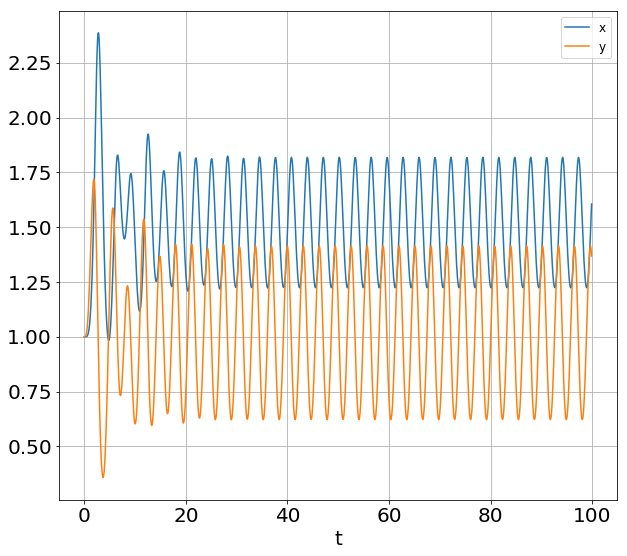

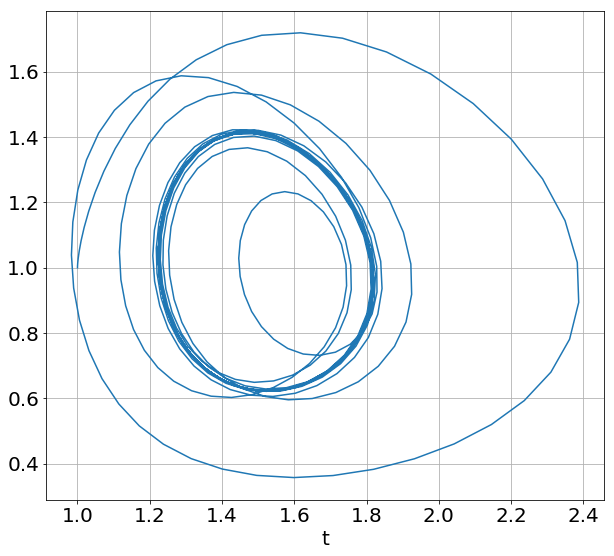

In [52]:
plt.figure(figsize=(10,9))
plt.plot(eu_ex85_t,eu_ex85_x, "-" , label="x")
plt.plot(eu_ex85_t,eu_ex85_y, "-" , label="y")
plt.xlabel("t" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,9))
plt.plot(eu_ex85_x,eu_ex85_y, "-")
plt.xlabel("t" , fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()